### Boston 주택 가격 예측(Linear Regression, scikit-learn 사용) :선형회귀모델

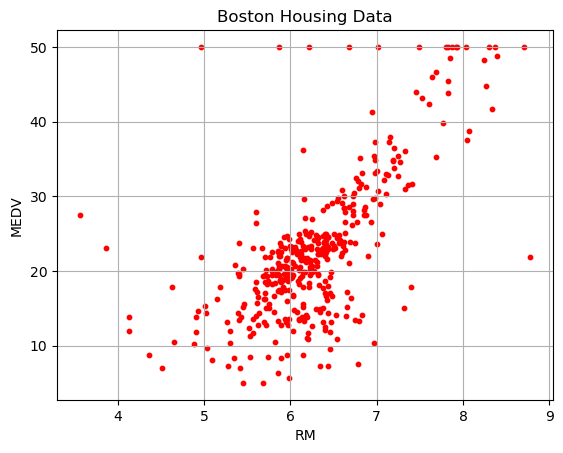

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,MEDV
0,2.30040,0.0,19.58,0.605,6.319,96.1,2.1000,403,14.7,23.8
1,13.35980,0.0,18.10,0.693,5.887,94.7,1.7821,666,20.2,12.7
2,0.12744,0.0,6.91,0.448,6.770,2.9,5.7209,233,17.9,26.6
3,0.15876,0.0,10.81,0.413,5.961,17.5,5.2873,305,19.2,21.7
4,0.03768,80.0,1.52,0.404,7.274,38.3,7.3090,329,12.6,34.6
...,...,...,...,...,...,...,...,...,...,...
395,0.23912,0.0,9.69,0.585,6.019,65.3,2.4091,391,19.2,21.2
396,0.04560,0.0,13.89,0.550,5.888,56.0,3.1121,276,16.4,23.3
397,1.38799,0.0,8.14,0.538,5.950,82.0,3.9900,307,21.0,13.2
398,7.36711,0.0,18.10,0.679,6.193,78.1,1.9356,666,20.2,11.0


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# EDA : 탐색적 데이터 분석, Exploratory Data Anaysis
df = pd.read_csv('boston_train.csv')
df.corr()  #상관계수  ,RM(방의 갯수) , MEDV(주택가격)

# 시각화
plt.scatter(df['RM'],df['MEDV'],c='r',s=10)  # 산점도
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.title('Boston Housing Data')
plt.grid()
plt.show()
df